In [2]:
# Import pandas and creating DataFrame from ham-spam.csv named df
import pandas as pd

df = pd.read_csv(r'../Data/ham-spam.csv')

df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [ ]:
# Get info bout df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IsSpam  1000 non-null   int64 
 1   Text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
# Check either df has duplicated letters
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  unfeigned alilum ciall ambiien aagrra xaanax c...    1

In [8]:
# Deleting duplicated letters
df = df.drop_duplicates()

df.groupby('IsSpam').describe() # As we can see duplicated rows were dropped

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  reminder vacationlouise would like remind you ...    1
1        500    500  unfeigned alilum ciall ambiien aagrra xaanax c...    1

In [11]:
# import CountVectorizer to vectorize letters
from sklearn.feature_extraction.text import CountVectorizer

# creating vectorizer with english stop words (and, the, or, etc.) and param which set option to extract unigrams and bigrams from text
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# vectorizing letter text
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [12]:
# Splitting our dataset into training and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
# Importing and fitting Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

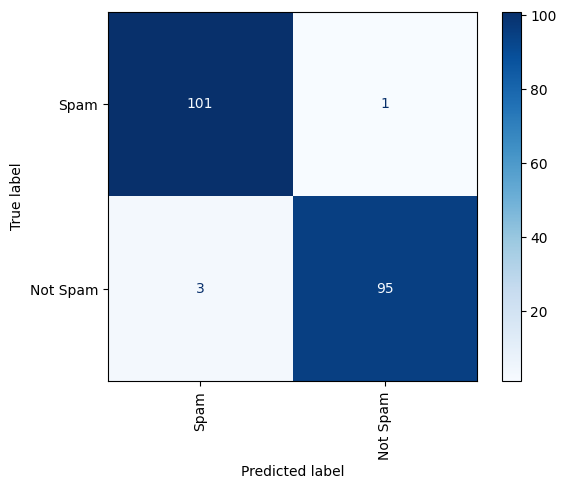

In [16]:
# Now plot Confusion Matrix to estimate
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test, cmap='Blues', display_labels=['Spam', 'Not Spam'], xticks_rotation='vertical')

In [17]:
# Evaluate accuracy score
model.score(x_test, y_test)

0.98

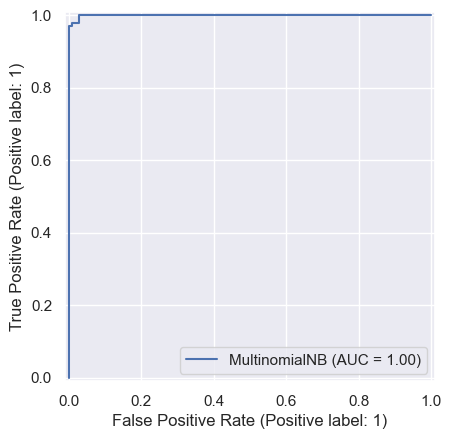

In [19]:
# Plot ROC-curve
from sklearn.metrics import RocCurveDisplay
import seaborn as sns

sns.set()
RocCurveDisplay.from_estimator(model, x_test, y_test)

In [ ]:
# Evaluate main metrics for Classification Models: Precision, Recall, Sensivity, Specifity
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensivity = recall
specifity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision score: {precision}')
print(f'Recall score: {recall}')
print(f'Sensivity: {sensivity}')
print(f'Specifity: {specifity}')

Precision score: 0.9895833333333334
Recall score: 0.9693877551020408
Sensivity: 0.9693877551020408
Specifity: 0.9901960784313726


As we have created a spam prediction model, it's important to classify all important emails as 0 (Not spam) and all spam emails as 1 (Spam).

Now, let's imagine a situation where our model incorrectly predicts an important email as spam (False Negative, FN). This would make our user very angry. In this situation, the most important metric is Recall (Sensitivity) for the Not Spam class.

In [35]:
# Test model on the unseen data before

letters = ["Can we have a meeting today?", "Don't miss ur chance to buy our product for less price and save ur $$$", 
           "Colleagues. On the Saturday we need to attend a code review"]

model.predict(vectorizer.transform([*letters]))

array([0, 1, 0])

As we can see, model correctly predicted spam and not spam letters.